In [1]:
#Importation des bibliothèques nécessaires
import pandas as pd #pour la manipulation et l'analyse des données.
import numpy as np #pour le calcul numérique.
import matplotlib.pyplot as plt #pour la visualisation de données.
import seaborn as sns #pour la visualisation de données basée sur matplotlib
from sklearn.preprocessing import StandardScaler #pour mettre à l'échelle les
#caractéristiques en retirant la moyenne et en mettant à l'échelle jusqu'à l'unité de variance
from sklearn.decomposition import PCA #pour l'analyse en composantes principales
from sklearn.cluster import KMeans #pour la methode clustering KMeans
from scipy.cluster.hierarchy import dendrogram, linkage #pour construire et visualiser les dendrogrammes
from sklearn.metrics import silhouette_score #pour évaluer la qualité de la segmentation d'un ensemble de données.
from scipy.cluster.hierarchy import fcluster #pour effectuer la classification à partir du dendrogramme,

# **Phase de Prétraitement**

In [2]:
#Importation du fichier csv et interprétation de jeu de données
data=pd.read_csv("/content/drive/MyDrive/AFDMaterials/cancer_des_poumons.csv")
df=pd.DataFrame(data)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,NaN,2,2,1,1.0,2,1,2,2,2,2,2,2
1,M,74,2.0,1,1,1,2.0,2,2,1,1,1,2,2,2
2,F,59,1.0,1,1,2,1.0,2,1,2,1,2,2,1,2
3,M,63,2.0,2,2,1,1.0,1,1,1,2,1,1,2,2
4,F,63,NaN,2,1,1,1.0,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1.0,1,1,2,2.0,2,1,1,2,2,2,2,1
305,M,70,2.0,1,1,1,1.0,2,2,2,2,2,2,1,2
306,M,58,2.0,1,1,1,1.0,1,2,2,2,2,1,1,2
307,M,67,2.0,1,2,1,1.0,2,2,1,2,2,2,1,2


Interprétation: 309 observations représentées par 15 caractéristiques

In [3]:
#Vérification de l'existence des observations qui sont manquantes ou NaN
val_manq=df.isnull().sum()
print("valeurs manquantes par colonne:")
print(val_manq)

valeurs manquantes par colonne:
GENDER                   0
AGE                      0
SMOKING                  2
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          1
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
dtype: int64


3 valeurs manquantes dans les colonnes Smoking & Chronic Disease




In [4]:
#Remplacement des valeurs manquantes par la moyenne de chaque colonne
for column in df.columns:
    if val_manq[column]:
        val_moyenne = df[column].mean()
        df[column].fillna(val_moyenne, inplace=True)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1.566775,2,2,1,1.0,2,1,2,2,2,2,2,2
1,M,74,2.000000,1,1,1,2.0,2,2,1,1,1,2,2,2
2,F,59,1.000000,1,1,2,1.0,2,1,2,1,2,2,1,2
3,M,63,2.000000,2,2,1,1.0,1,1,1,2,1,1,2,2
4,F,63,1.566775,2,1,1,1.0,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1.000000,1,1,2,2.0,2,1,1,2,2,2,2,1
305,M,70,2.000000,1,1,1,1.0,2,2,2,2,2,2,1,2
306,M,58,2.000000,1,1,1,1.0,1,2,2,2,2,1,1,2
307,M,67,2.000000,1,2,1,1.0,2,2,1,2,2,2,1,2


# **Phase de Transformation**

In [5]:
#Création d'un dictionnaire pour la colonne Gender
mapping={'F' : 0 , 'M' : 1}
#Transformation des caractérstiques en entier
df['GENDER']=df['GENDER'].map(mapping)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1.566775,2,2,1,1.0,2,1,2,2,2,2,2,2
1,1,74,2.000000,1,1,1,2.0,2,2,1,1,1,2,2,2
2,0,59,1.000000,1,1,2,1.0,2,1,2,1,2,2,1,2
3,1,63,2.000000,2,2,1,1.0,1,1,1,2,1,1,2,2
4,0,63,1.566775,2,1,1,1.0,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1.000000,1,1,2,2.0,2,1,1,2,2,2,2,1
305,1,70,2.000000,1,1,1,1.0,2,2,2,2,2,2,1,2
306,1,58,2.000000,1,1,1,1.0,1,2,2,2,2,1,1,2
307,1,67,2.000000,1,2,1,1.0,2,2,1,2,2,2,1,2


In [6]:
sc=StandardScaler()
#Vérification de la normalisation de la base
is_normalized = False
if  not is_normalized:
  z=sc.fit_transform(df)#Centrage des données
  df = pd.DataFrame(z, columns=df.columns)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.952579,0.771850,0.000000,0.869300,1.003241,-1.003241,-1.014716,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475
1,0.952579,1.381829,0.877125,-1.150351,-0.996769,-1.003241,0.988697,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475
2,-1.049781,-0.448107,-1.147516,-1.150351,-0.996769,0.996769,-1.014716,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475
3,0.952579,0.039876,0.877125,0.869300,1.003241,-1.003241,-1.014716,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475
4,-1.049781,0.039876,0.000000,0.869300,-0.996769,-1.003241,-1.014716,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-1.049781,-0.814095,-1.147516,-1.150351,-0.996769,0.996769,0.988697,0.696833,-1.120480,-1.120480,0.892475,0.852207,0.748736,1.063501,-1.120480
305,0.952579,0.893846,0.877125,-1.150351,-0.996769,-1.003241,-1.014716,0.696833,0.892475,0.892475,0.892475,0.852207,0.748736,-0.940291,0.892475
306,0.952579,-0.570103,0.877125,-1.150351,-0.996769,-1.003241,-1.014716,-1.435063,0.892475,0.892475,0.892475,0.852207,-1.335584,-0.940291,0.892475
307,0.952579,0.527859,0.877125,-1.150351,1.003241,-1.003241,-1.014716,0.696833,0.892475,-1.120480,0.892475,0.852207,0.748736,-0.940291,0.892475


In [7]:
#Affichage de la matrice de corrélation
mat_corr=df.corr()
mat_corr

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
GENDER,1.000000,0.021306,0.036069,-0.212959,-0.152127,-0.275564,-0.208392,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958
AGE,0.021306,1.000000,-0.081817,0.005205,0.053170,0.018685,-0.017340,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,0.036069,-0.081817,1.000000,-0.008190,0.160968,-0.050455,-0.146988,-0.032442,-0.006401,-0.123344,-0.051683,-0.123688,0.067084,0.031305,0.119778
YELLOW_FINGERS,-0.212959,0.005205,-0.008190,1.000000,0.565829,0.323083,0.044045,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,-0.152127,0.053170,0.160968,0.565829,1.000000,0.216841,-0.006399,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,-0.275564,0.018685,-0.050455,0.323083,0.216841,1.000000,0.051869,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.208392,-0.017340,-0.146988,0.044045,-0.006399,0.051869,1.000000,-0.108424,0.109493,-0.053730,-0.001525,-0.179431,-0.024044,0.078794,-0.040679
FATIGUE,-0.083560,0.012614,-0.032442,-0.118058,-0.188538,0.078148,-0.108424,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.154251,0.027990,-0.006401,-0.144300,-0.165750,-0.081800,0.109493,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.141207,0.055011,-0.123344,-0.078515,-0.191807,-0.068771,-0.053730,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640


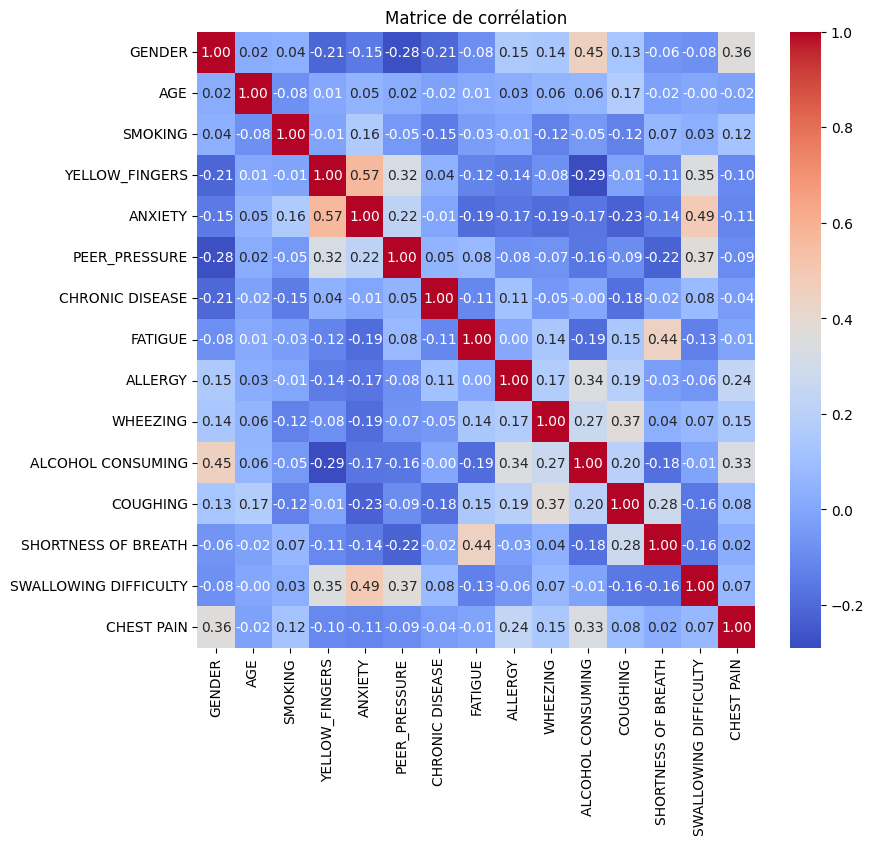

In [8]:
#Création d'une nouvelle figure avec spécification de la taille de la figure
#en largeur et en hauteur pour faciliter la lisibilité
plt.figure(figsize=(9, 8))
#Traçage de la carte de chaleur (heatmap) de données bidimensionnelles
sns.heatmap(mat_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [9]:
#Affichage des 3 premiers couples plus corrélés:
couple_plus_corr=mat_corr.unstack().sort_values(ascending=False)
top_couples_corr = couple_plus_corr[couple_plus_corr < 1.0][:6]
print("Couples de variables les plus corrélés:")
print(top_couples_corr)

Couples de variables les plus corrélés:
YELLOW_FINGERS         ANXIETY                  0.565829
ANXIETY                YELLOW_FINGERS           0.565829
SWALLOWING DIFFICULTY  ANXIETY                  0.489403
ANXIETY                SWALLOWING DIFFICULTY    0.489403
ALCOHOL CONSUMING      GENDER                   0.454268
GENDER                 ALCOHOL CONSUMING        0.454268
dtype: float64


# **Phase d’extraction des caractéristiques**

Matrice Y:
 [[-0.55493371  0.67223531 -1.7488929  ... -0.64993268  0.30434005
   0.43071819]
 [-0.69544815 -0.32061579  1.04199725 ...  1.83633382  0.54489194
   0.54599223]
 [-0.791573   -2.08783586 -0.88237083 ... -0.23989378 -0.28017981
  -1.02038651]
 ...
 [-2.61670646  1.58224216  1.10092295 ...  0.25972266  0.29101917
  -0.30621186]
 [-1.86703609  0.03733447  0.39915013 ... -0.78414149  0.51936131
  -0.89160038]
 [-0.70759825  0.98056213 -0.17005514 ...  0.68054039 -0.29111241
   0.48602686]]
Composantes principales :
[[-0.32151245 -0.03532384  0.04424042  0.37965648  0.40325144  0.30518301
   0.09380579 -0.10372346 -0.25177484 -0.24614989 -0.33363416 -0.28006549
  -0.14029197  0.29016447 -0.23743043]
 [ 0.30805453  0.03806395  0.04099905  0.11768616  0.22588897  0.08036353
   0.04309354 -0.42989577  0.21678909  0.09613101  0.42437368 -0.08020527
  -0.44545947  0.33275371  0.30339293]
 [ 0.07897828 -0.26073716  0.19505395 -0.31396381 -0.13774556 -0.30075393
   0.08620677 -0.30436

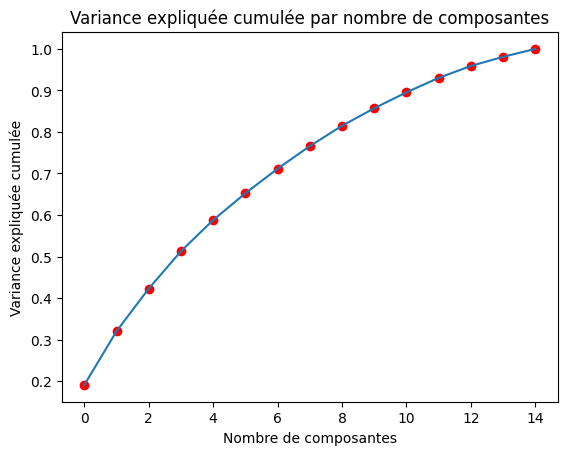

In [10]:
#Création d'une instance de la classe PCA
pca=PCA()
scaled_data = pca.fit_transform(z)#Transformation des données dans un nouvel
#espace de dimension réduite défini par les composantes principales.
print("Matrice Y:\n",scaled_data)
#Affichage des vecteurs propres des composantes principales
print("Composantes principales :")
print(pca.components_)
#Affichage de la variance expliquée par chaque composante principale
print("\nVariance expliquée par chaque composante :")
print(pca.explained_variance_ratio_)
#Traçage de graphique de la variance expliquée cumulée
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.scatter(range(len(pca.explained_variance_ratio_)),
            np.cumsum(pca.explained_variance_ratio_), color='red')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par nombre de composantes')
plt.show()

Déterminer le pourcentage d’inertie à partir de l’éboulis des valeurs propres

In [11]:
#Calcul de la somme totale des valeurs propres
total_val_propres = sum(pca.explained_variance_)
#Calcul du pourcentage d'inertie
pourcentage_inertie = (pca.explained_variance_ / total_val_propres) * 100
#Affichage du pourcentage d'inertie pour chaque composante de la dataframe
for i, percentage in enumerate(pourcentage_inertie):
    print(f"{df.columns[i]} : {percentage:.2f}%")

GENDER : 19.08%
AGE : 12.94%
SMOKING : 10.26%
YELLOW_FINGERS : 9.00%
ANXIETY : 7.50%
PEER_PRESSURE : 6.46%
CHRONIC DISEASE : 5.92%
FATIGUE : 5.43%
ALLERGY : 4.90%
WHEEZING : 4.22%
ALCOHOL CONSUMING : 3.83%
COUGHING : 3.49%
SHORTNESS OF BREATH : 2.87%
SWALLOWING DIFFICULTY : 2.20%
CHEST PAIN : 1.90%


Afficher la saturation des variables et tracer le cercle de corrélation

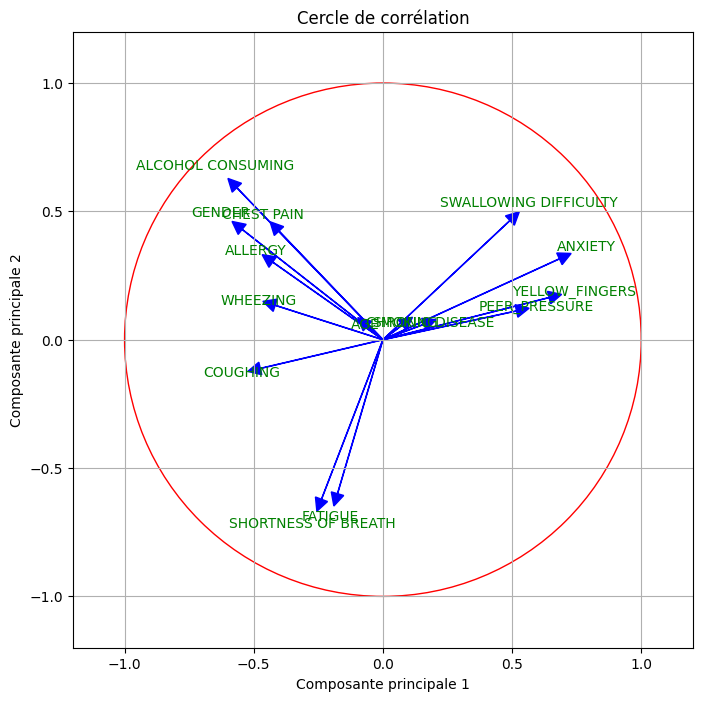

In [12]:
#Calcul des vecteurs propres (loadings) des variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
#Traçage du cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
for i, (comp_1, comp_2) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    ax.arrow(0, 0, comp_1, comp_2, head_width=0.05, head_length=0.05, color='b')
    ax.text(comp_1 * 1.15, comp_2 * 1.15, df.columns[i], color='g', ha='center',
            va='center')
#Ajout d'un cercle unitaire
circle = plt.Circle((0, 0), 1, color='r', fill=False)
ax.add_artist(circle)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Cercle de corrélation')
plt.grid()
plt.show()

# **Phase de data Mining**

Appliquer l'algorithme des K-means pour diviser les données en deux classes.

In [13]:
#Instanciation du modèle K-means avec n_clusters indique 2 clusters
#et random_state=42 assure la reproductibilité des résultats.
kmeans = KMeans(n_clusters=2, random_state=42)
#Application de l'algorithme KMeans aux données scaled_data
#et assignement de chaque individu à un cluster
clusters = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Afficher dans un graphe les centroïdes et les données appartenant à chaque classe.


Coordonnées des centroïdes :
Cluster 1 : [ 1.20687462 -0.05164037  0.11251596  0.01867264 -0.010749   -0.06551331
  0.03198776 -0.0095683  -0.03608299 -0.00171682 -0.02220973  0.0272964
 -0.00217497 -0.01215449  0.0046786 ]
Cluster 2 : [-1.70659614  0.07302271 -0.1591046  -0.02640428  0.01519975  0.09263991
 -0.04523269  0.01353017  0.0510236   0.00242769  0.03140594 -0.03859881
  0.00307555  0.01718721 -0.00661584]


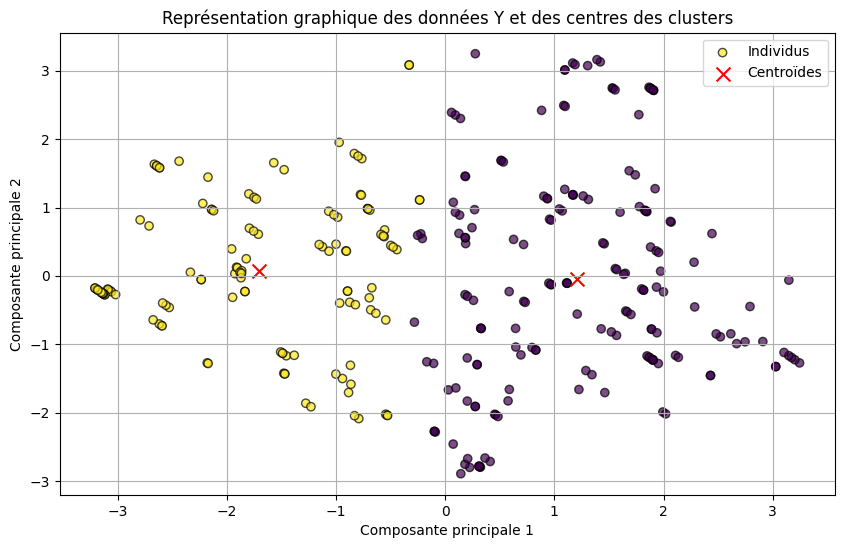

In [14]:
#Affichage des coordonnées de chaque centroïde
centroides = kmeans.cluster_centers_
print("Coordonnées des centroïdes :")
for i, centroide in enumerate(centroides):
    print(f"Cluster {i+1} : {centroide}")

#Représentation graphique des données et des centres des clusters
plt.figure(figsize=(10, 6))

#Données scaled_data
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis',
            edgecolors='k', alpha=0.7, label='Individus')

#Centres des clusters
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, c='red',
            label='Centroïdes')

plt.title('Représentation graphique des données Y et des centres des clusters')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.grid(True)
plt.show()


Appliquer l'algorithme Classification Ascendante Hiérarchique (CAH) pour diviser les données en deux classes.

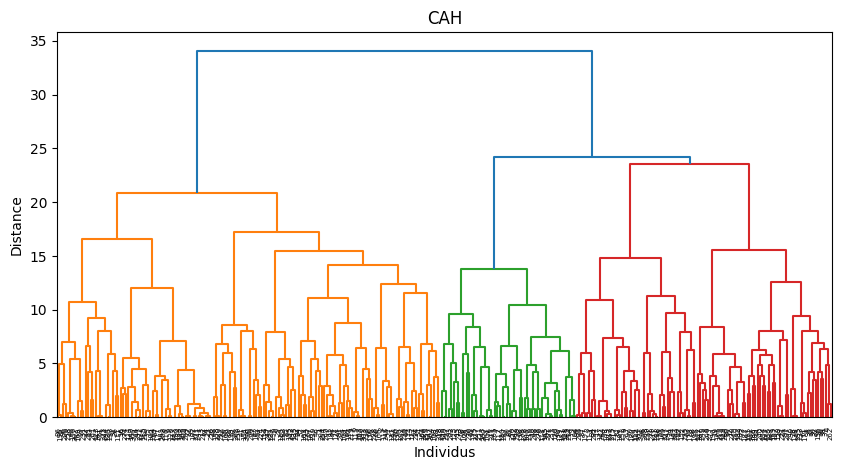

In [15]:
#Calcul de la matrice de liaison avec les résultats de PCA
d = linkage(scaled_data, method='ward')

#Affichage de dendrogramme pour CAH
plt.figure(figsize=(10, 5))
plt.title('CAH')
dendrogram(d, p=2)
plt.xlabel("Individus")
plt.ylabel("Distance")
plt.show()

In [16]:
#Nombre de clusters souhaité pour la CAH
nombre_clusters_cah = 2
#Attribution des étiquettes de cluster à partir de la matrice de liaison
labels_cah = fcluster(d, nombre_clusters_cah, criterion='maxclust')
#Calcul le score de silhouette pour la CAH
cah_silhouette = silhouette_score(scaled_data, labels_cah)

#Calcul le score de silhouette pour K-means
kmeans_silhouette = silhouette_score(scaled_data, kmeans.labels_)
#Affichage des scores de silhouette
print("Score de silhouette pour CAH:", cah_silhouette)
print("Score de silhouette pour K-means:", kmeans_silhouette)

Score de silhouette pour CAH: 0.12591035161241218
Score de silhouette pour K-means: 0.13584432605907965


Comparer les résultats des deux algorithmes.

In [17]:
#Comparaison des scores de silhouette
if cah_silhouette > kmeans_silhouette:
    print("La Classification Ascendante Hiérarchique (CAH) offre"
    "une meilleure séparation des clusters.")
elif kmeans_silhouette > cah_silhouette:
    print("K-means offre une meilleure séparation des clusters.")
else:
    print("Les deux méthodes offrent des performances de clustering similaires "
    "en termes de séparation des clusters.")

K-means offre une meilleure séparation des clusters.


# **Interface de l'application**

Button(description='Import Data', style=ButtonStyle())

Button(description='Preprocess Data', style=ButtonStyle())

Button(description='Apply PCA', style=ButtonStyle())

Button(description='Apply KMeans', style=ButtonStyle())

Button(description='Display Results', style=ButtonStyle())

Data imported successfully.
Data preprocessed successfully.
PCA applied successfully.
KMeans applied successfully.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


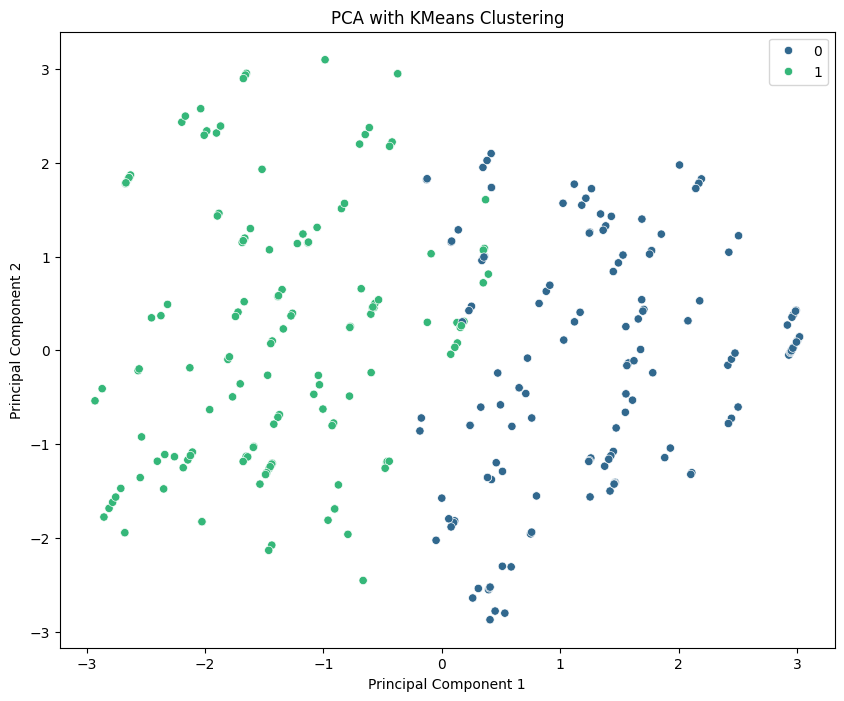

In [21]:
import ipywidgets as widgets
from IPython.display import display

data = None
data_normalized = None
pca_result = None
clusters = None

def import_data(b):
    global data
    data = pd.read_csv('/content/drive/MyDrive/AFDMaterials/cancer_des_poumons.csv')
    print("Data imported successfully.")
def preprocess_data(b):
    global data_normalized
    if data is not None:
        #Exclusion des colonnes non numériques
        non_numeric_columns = data.select_dtypes(exclude=['number']).columns
        numeric_data = data.drop(non_numeric_columns, axis=1)

        scaler = StandardScaler()
        data_normalized = scaler.fit_transform(numeric_data)
        print("Data preprocessed successfully.")
def apply_pca(b):
    global pca_result
    if data_normalized is not None:
        #Remplacement des valeurs manquantes par la moyenne de la colonne
        data_no_nan = pd.DataFrame(data_normalized).fillna(pd.DataFrame(data_normalized).mean())

        pca = PCA()
        pca_result = pca.fit_transform(data_no_nan)
        print("PCA applied successfully.")

def apply_kmeans(b):
    global clusters
    if pca_result is not None:
        kmeans = KMeans(n_clusters=2, random_state=42)
        clusters = kmeans.fit_predict(pca_result)
        print("KMeans applied successfully.")

def display_results(b):
    if clusters is not None:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette="viridis")
        plt.title("PCA with KMeans Clustering")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.show()

#Creation de boutons
btn_import = widgets.Button(description='Import Data')
btn_preprocess = widgets.Button(description='Preprocess Data')
btn_pca = widgets.Button(description='Apply PCA')
btn_kmeans = widgets.Button(description='Apply KMeans')
btn_display = widgets.Button(description='Display Results')

#Attachement des boutons au fonctions
btn_import.on_click(import_data)
btn_preprocess.on_click(preprocess_data)
btn_pca.on_click(apply_pca)
btn_kmeans.on_click(apply_kmeans)
btn_display.on_click(display_results)

#Affichage des boutons
display(btn_import, btn_preprocess, btn_pca, btn_kmeans, btn_display)

In [18]:
#Merci pour votre attention ~ Aymen KOLSI ADBD TD6 TP2